# Project 4

## Clustering Analysis and PCA

To see if any additional insight can be garnered into this data, we performed a Clustering Analysis using KMeans and KPrototype clustering algorithms. We also performed a Primary Component Analysis to see if any feature combinations were more strongly representative in the dataset.

As will be demonstrated, none of these reviews gave any significant insight into the data.

---

## 0. Imports and Preliminaries

**NOTE** Third-party library `kmodes` is required for KPrototype Clustering

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# PCA
from sklearn.decomposition import PCA

# algorithms
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

# metrics
from sklearn.metrics import silhouette_score

# other
import time
import json

In [2]:
# set random seed in case forgot to do a random state further down
np.random.seed(42)

In [3]:
# For plot images
IMGDIR = '../images/'
with open('styles.json', 'r') as f:
    PLOT_STYLES = json.loads(f.read())

In [4]:
# Import cleaned data
full_df = pd.read_csv('../data/ohe_data.csv')

# drop "Unnamed: 0" column if exists
if "Unnamed: 0" in full_df.columns: full_df.drop(columns=['Unnamed: 0'], inplace=True)

# correct sunrise/sunset column to be numerical if not, 0=Day, 1=Night
full_df = full_df.replace({'Day': 0, 'Night': 1})

# make any true/false values into 1/0
full_df = full_df.replace({True: 1, False: 0})

In [5]:
# make a dataframe with just the relevant columns
# we will not be using the full date column nor the latitude/longitude columns
full_df = full_df.drop(columns=['Start_Time', 'Start_Lat', 'Start_Lng', 'day'])

---

## 1. KMeans Clustering

1. Perform KMeans Clustering on one-hot-encoded data set. Evaluate clustering performance via silhouette score, and review over various number of clusters to see if an optimal cluster count can be found.

2. Try it with a subset of features.

As will be shown, the resource and time costs of this are prohibitive to performing on the full data set, and scores do not justify that attempt.

### 1a. KMeans With All Features

Performed on small subset of full dataset.

In [6]:
# create a smaller dataframe to test on
small_df = full_df.sample(25_000)

# check to make sure we still have the same proportion (90% 0) of target categories
small_df['Severity'].value_counts(normalize=True)

0    0.89684
1    0.10316
Name: Severity, dtype: float64

In [7]:
# scale values
ss = StandardScaler()
small_df_ss = ss.fit_transform(small_df.drop(columns=['Severity']))

In [8]:
%%time

# model on various number of clusters to find optimal number
# NOTE the below code can take a while to run. Uncomment to run or see below for previous results.

# these scores are from a previous run
scores = [(10, 2819738.976076258, 0.01279616813408531),
 (20, 2583574.665011947, 0.03309245090651906),
 (30, 2354826.938014061, 0.056840661690341576),
 (40, 2116807.635388683, 0.07435303852848524),
 (50, 1930646.4776734991, 0.08642226501879748),
 (60, 1713480.8122619523, 0.1071977676128963),
 (70, 1522790.5571559658, 0.1237176053339064),
 (80, 1413122.0903399272, 0.11767131273534691),
 (90, 1353026.3758239313, 0.12356600089191037),
 (100, 1303865.4422159325, 0.10695240840172184),
 (110, 1288132.845995484, 0.11081811855640537),
 (120, 1265757.9410842708, 0.11444470214983894),
 (130, 1250671.36279192, 0.10324117518969907),
 (140, 1238357.6804947506, 0.09898821649536141)]

'''
scores = [] # save scores for later
for k in range(10,141,10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(small_df_ss)
    sil_score = silhouette_score(small_df_ss, km.labels_)
    scores.append((k, km.inertia_, sil_score))
    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {sil_score}')

scores
'''

CPU times: user 178 µs, sys: 22 µs, total: 200 µs
Wall time: 292 µs


"\nscores = [] # save scores for later\nfor k in range(10,141,10):\n    km = KMeans(n_clusters=k, random_state=1)\n    km.fit(small_df_ss)\n    sil_score = silhouette_score(small_df_ss, km.labels_)\n    scores.append((k, km.inertia_, sil_score))\n    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {sil_score}')\n\nscores\n"

For demonstration, the above code is copied here:
```python
scores = [] # save scores for later
for k in range(10,141,10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(small_df_ss)
    sil_score = silhouette_score(small_df_ss, km.labels_)
    scores.append(sil_score)
    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {sil_score}')
```
Below are the results on one run of the above code
```
10: inertia - 2819738.976076258; sil. sc. - 0.01279616813408531
20: inertia - 2583574.665011947; sil. sc. - 0.03309245090651906
30: inertia - 2354826.938014061; sil. sc. - 0.056840661690341576
40: inertia - 2116807.635388683; sil. sc. - 0.07435303852848524
50: inertia - 1930646.4776734991; sil. sc. - 0.08642226501879748
60: inertia - 1713480.8122619523; sil. sc. - 0.1071977676128963
70: inertia - 1522790.5571559658; sil. sc. - 0.1237176053339064
80: inertia - 1413122.0903399272; sil. sc. - 0.11767131273534691
90: inertia - 1353026.3758239313; sil. sc. - 0.12356600089191037
100: inertia - 1303865.4422159325; sil. sc. - 0.10695240840172184
110: inertia - 1288132.845995484; sil. sc. - 0.11081811855640537
120: inertia - 1265757.9410842708; sil. sc. - 0.11444470214983894
130: inertia - 1250671.36279192; sil. sc. - 0.10324117518969907
140: inertia - 1238357.6804947506; sil. sc. - 0.09898821649536141
CPU times: user 11min 52s, sys: 4min 35s, total: 16min 27s
Wall time: 2min 43s
[(10, 2819738.976076258, 0.01279616813408531),
 (20, 2583574.665011947, 0.03309245090651906),
 (30, 2354826.938014061, 0.056840661690341576),
 (40, 2116807.635388683, 0.07435303852848524),
 (50, 1930646.4776734991, 0.08642226501879748),
 (60, 1713480.8122619523, 0.1071977676128963),
 (70, 1522790.5571559658, 0.1237176053339064),
 (80, 1413122.0903399272, 0.11767131273534691),
 (90, 1353026.3758239313, 0.12356600089191037),
 (100, 1303865.4422159325, 0.10695240840172184),
 (110, 1288132.845995484, 0.11081811855640537),
 (120, 1265757.9410842708, 0.11444470214983894),
 (130, 1250671.36279192, 0.10324117518969907),
 (140, 1238357.6804947506, 0.09898821649536141)]
```
The results show the inertia and silhouette scores for various number of clusters. The idea was to hone in on an approximate cluster count and then narrow down with more fine-grained review.

In [9]:
# tests start at 10, so (index + 1) * 10 is number of clusters with high score
sil_scores = list(zip(*scores))[2]
high_score_ix = np.argmax(sil_scores)
high_score_ix, max(sil_scores), (high_score_ix + 1) * 10

(6, 0.1237176053339064, 70)

In [10]:
%%time
# get highest score cluster count from last test
ccount = (high_score_ix + 1) * 10

# This is a placeholder for a previous run due to long generating time
scores = [(55, 1778000.132543454, 0.09884644470804606),
 (56, 1798254.0231082684, 0.1136867341715933),
 (57, 1754892.959313944, 0.12041070706790195),
 (58, 1763898.489473734, 0.107811894648341),
 (59, 1740491.0572207444, 0.12304482388241916),
 (60, 1673433.6633976158, 0.11988884298838877),
 (61, 1682109.9396359413, 0.11805459367579159),
 (62, 1649418.4119979031, 0.11245393646225288),
 (63, 1661295.5446111653, 0.10216116711472398),
 (64, 1620325.6896279184, 0.11094589597088998),
 (65, 1607092.4949607877, 0.10773927838455409),
 (66, 1611087.4942660746, 0.0970396118575905),
 (67, 1605713.492242406, 0.13059140332375613),
 (68, 1529662.1578341906, 0.12436485763895634),
 (69, 1556145.5168899477, 0.14449826489724435),
 (70, 1533254.5740267867, 0.13018341947830392),
 (71, 1540771.2908349338, 0.12603278629203116),
 (72, 1516139.4539267318, 0.12050035215796435),
 (73, 1534130.1379699456, 0.1106011261602225),
 (74, 1498740.1980750298, 0.14244953775433639),
 (75, 1515839.5883336333, 0.11756336115111506),
 (76, 1487338.2507019695, 0.11786986897104733),
 (77, 1447562.3269533576, 0.1156551930498267),
 (78, 1438385.5497680493, 0.11748157894211463),
 (79, 1433964.5467836433, 0.11858436876727223),
 (80, 1417245.8038015158, 0.11996126683267352),
 (81, 1413980.5806665597, 0.11900113915000424),
 (82, 1412177.7453222, 0.10872110961755263),
 (83, 1416902.6299625477, 0.12059417753290474),
 (84, 1403164.1126810664, 0.11479128455963895),
 (85, 1374523.3365366582, 0.11962114418329134)]

# Test 15 below to 15 above high score count to narrow down on highest score
# NOTE the below code can take a while. Uncomment to run or see below for previous results

'''
scores = []
for k in range(ccount - 15, ccount + 16, 1):
    km = KMeans(n_clusters=k)
    km.fit(small_df_ss)
    sil_sc = silhouette_score(small_df_ss, km.labels_)
    scores.append((k, km.inertia_, sil_sc))
    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {sil_sc}')

scores
'''

CPU times: user 148 µs, sys: 5 µs, total: 153 µs
Wall time: 175 µs


"\nscores = []\nfor k in range(ccount - 15, ccount + 16, 1):\n    km = KMeans(n_clusters=k)\n    km.fit(small_df_ss)\n    sil_sc = silhouette_score(small_df_ss, km.labels_)\n    scores.append((k, km.inertia_, sil_sc))\n    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {sil_sc}')\n\nscores\n"

For demonstration, the above code is copied here:
```python
scores = []
for k in range(ccount - 15, ccount + 16, 1):
    km = KMeans(n_clusters=k)
    km.fit(small_df_ss)
    sil_sc = silhouette_score(small_df_ss, km.labels_)
    scores.append(sil_sc)
    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {sil_sc}')
```
Below are the results on one run of this code.
```
55: inertia - 1778000.132543454; sil. sc. - 0.09884644470804606
56: inertia - 1798254.0231082684; sil. sc. - 0.1136867341715933
57: inertia - 1754892.959313944; sil. sc. - 0.12041070706790195
58: inertia - 1763898.489473734; sil. sc. - 0.107811894648341
59: inertia - 1740491.0572207444; sil. sc. - 0.12304482388241916
60: inertia - 1673433.6633976158; sil. sc. - 0.11988884298838877
61: inertia - 1682109.9396359413; sil. sc. - 0.11805459367579159
62: inertia - 1649418.4119979031; sil. sc. - 0.11245393646225288
63: inertia - 1661295.5446111653; sil. sc. - 0.10216116711472398
64: inertia - 1620325.6896279184; sil. sc. - 0.11094589597088998
65: inertia - 1607092.4949607877; sil. sc. - 0.10773927838455409
66: inertia - 1611087.4942660746; sil. sc. - 0.0970396118575905
67: inertia - 1605713.492242406; sil. sc. - 0.13059140332375613
68: inertia - 1529662.1578341906; sil. sc. - 0.12436485763895634
69: inertia - 1556145.5168899477; sil. sc. - 0.14449826489724435
70: inertia - 1533254.5740267867; sil. sc. - 0.13018341947830392
71: inertia - 1540771.2908349338; sil. sc. - 0.12603278629203116
72: inertia - 1516139.4539267318; sil. sc. - 0.12050035215796435
73: inertia - 1534130.1379699456; sil. sc. - 0.1106011261602225
74: inertia - 1498740.1980750298; sil. sc. - 0.14244953775433639
75: inertia - 1515839.5883336333; sil. sc. - 0.11756336115111506
76: inertia - 1487338.2507019695; sil. sc. - 0.11786986897104733
77: inertia - 1447562.3269533576; sil. sc. - 0.1156551930498267
78: inertia - 1438385.5497680493; sil. sc. - 0.11748157894211463
79: inertia - 1433964.5467836433; sil. sc. - 0.11858436876727223
80: inertia - 1417245.8038015158; sil. sc. - 0.11996126683267352
81: inertia - 1413980.5806665597; sil. sc. - 0.11900113915000424
82: inertia - 1412177.7453222; sil. sc. - 0.10872110961755263
83: inertia - 1416902.6299625477; sil. sc. - 0.12059417753290474
84: inertia - 1403164.1126810664; sil. sc. - 0.11479128455963895
85: inertia - 1374523.3365366582; sil. sc. - 0.11962114418329134
CPU times: user 25min 2s, sys: 9min 57s, total: 35min
Wall time: 5min 15s
[(55, 1778000.132543454, 0.09884644470804606),
 (56, 1798254.0231082684, 0.1136867341715933),
 (57, 1754892.959313944, 0.12041070706790195),
 (58, 1763898.489473734, 0.107811894648341),
 (59, 1740491.0572207444, 0.12304482388241916),
 (60, 1673433.6633976158, 0.11988884298838877),
 (61, 1682109.9396359413, 0.11805459367579159),
 (62, 1649418.4119979031, 0.11245393646225288),
 (63, 1661295.5446111653, 0.10216116711472398),
 (64, 1620325.6896279184, 0.11094589597088998),
 (65, 1607092.4949607877, 0.10773927838455409),
 (66, 1611087.4942660746, 0.0970396118575905),
 (67, 1605713.492242406, 0.13059140332375613),
 (68, 1529662.1578341906, 0.12436485763895634),
 (69, 1556145.5168899477, 0.14449826489724435),
 (70, 1533254.5740267867, 0.13018341947830392),
 (71, 1540771.2908349338, 0.12603278629203116),
 (72, 1516139.4539267318, 0.12050035215796435),
 (73, 1534130.1379699456, 0.1106011261602225),
 (74, 1498740.1980750298, 0.14244953775433639),
 (75, 1515839.5883336333, 0.11756336115111506),
 (76, 1487338.2507019695, 0.11786986897104733),
 (77, 1447562.3269533576, 0.1156551930498267),
 (78, 1438385.5497680493, 0.11748157894211463),
 (79, 1433964.5467836433, 0.11858436876727223),
 (80, 1417245.8038015158, 0.11996126683267352),
 (81, 1413980.5806665597, 0.11900113915000424),
 (82, 1412177.7453222, 0.10872110961755263),
 (83, 1416902.6299625477, 0.12059417753290474),
 (84, 1403164.1126810664, 0.11479128455963895),
 (85, 1374523.3365366582, 0.11962114418329134)]
```
For this run the cluster count analysis was done in a range around 70 (+/- 15) to find the highest silhouette score.

In [11]:
# Get best score and number of clusters
sep_scores = list(zip(*scores))
max_sil_score_ix = np.argmax(sep_scores[2])
max_sil_score = sep_scores[2][max_sil_score_ix]
best_k = sep_scores[0][max_sil_score_ix]
print(f'max. silhouette score: {max_sil_score}; number of clusters: {best_k}')

max. silhouette score: 0.14449826489724435; number of clusters: 69


#### Conclusion

The low silhouette scores here do not justify further exploration. There is no indication that the full dataset can be adequately clustered under KMeans.

## 1b. KMeans On a Feature Subset

Attempt KMeans clustering on a subset of the data (specifically: weather related data) to see if higher silhouette scores can be achieved.

In [12]:
# Weather features only
small_df.columns[1:7], small_df.columns[20:29]

(Index(['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
        'Wind_Speed(mph)', 'Precipitation(in)'],
       dtype='object'),
 Index(['wc_clouds', 'wc_dust', 'wc_fair', 'wc_fog', 'wc_ice', 'wc_rain',
        'wc_snow', 'wc_thunder', 'wc_wind'],
       dtype='object'))

In [13]:
# get dataframe with only weather columns
weather_cols = list(small_df.columns[1:7]) + list(small_df.columns[20:29])
weather_df = small_df[weather_cols]

In [14]:
# scale all values
ss = StandardScaler()
wdf_ss = ss.fit_transform(weather_df)

In [15]:
%%time

# These scores are copied from a previous model fitting of the below code
scores = [[4, 256072.04579303213],
 [5, 227554.2376321967],
 [6, 202065.96235178213],
 [7, 177094.1785625173],
 [8, 153850.87448911023],
 [9, 127702.21587324908],
 [10, 115516.70349251636],
 [11, 104038.67743540397],
 [12, 96337.40040246959],
 [13, 87004.20764643188],
 [14, 83332.56488990947],
 [15, 80106.3672782928]]

# NOTE the below takes about 5 minutes to run. 
# Uncomment to run or see below for previous results

# test various cluster counts for highest silhouette score
'''
scores = []
for k in range(4,16,1):
    km = KMeans(n_clusters=k)
    km.fit(wdf_ss)
    scores.append([k, km.inertia_])
    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {silhouette_score(wdf_ss, km.labels_)}')
    
scores
'''

CPU times: user 98 µs, sys: 22 µs, total: 120 µs
Wall time: 139 µs


"\nscores = []\nfor k in range(4,16,1):\n    km = KMeans(n_clusters=k)\n    km.fit(wdf_ss)\n    scores.append([k, km.inertia_])\n    print(f'{k}: inertia - {km.inertia_}; sil. sc. - {silhouette_score(wdf_ss, km.labels_)}')\n    \nscores\n"

Results from above code:
```
4: inertia - 256072.04579303213; sil. sc. - 0.31444170083606704
5: inertia - 227554.2376321967; sil. sc. - 0.34311048078809936
6: inertia - 202065.96235178213; sil. sc. - 0.35232087538538825
7: inertia - 177094.1785625173; sil. sc. - 0.36866691654031486
8: inertia - 153850.87448911023; sil. sc. - 0.3859684217665287
9: inertia - 127702.21587324908; sil. sc. - 0.3919532943441802
10: inertia - 115516.70349251636; sil. sc. - 0.32611419239309214
11: inertia - 104038.67743540397; sil. sc. - 0.3422980570538983
12: inertia - 96337.40040246959; sil. sc. - 0.2989968321282588
13: inertia - 87004.20764643188; sil. sc. - 0.30072288568256295
14: inertia - 83332.56488990947; sil. sc. - 0.30221400712921
15: inertia - 80106.3672782928; sil. sc. - 0.297737217007366
CPU times: user 3min 5s, sys: 2min 25s, total: 5min 31s
Wall time: 1min 23s
[[4, 256072.04579303213],
 [5, 227554.2376321967],
 [6, 202065.96235178213],
 [7, 177094.1785625173],
 [8, 153850.87448911023],
 [9, 127702.21587324908],
 [10, 115516.70349251636],
 [11, 104038.67743540397],
 [12, 96337.40040246959],
 [13, 87004.20764643188],
 [14, 83332.56488990947],
 [15, 80106.3672782928]]
```

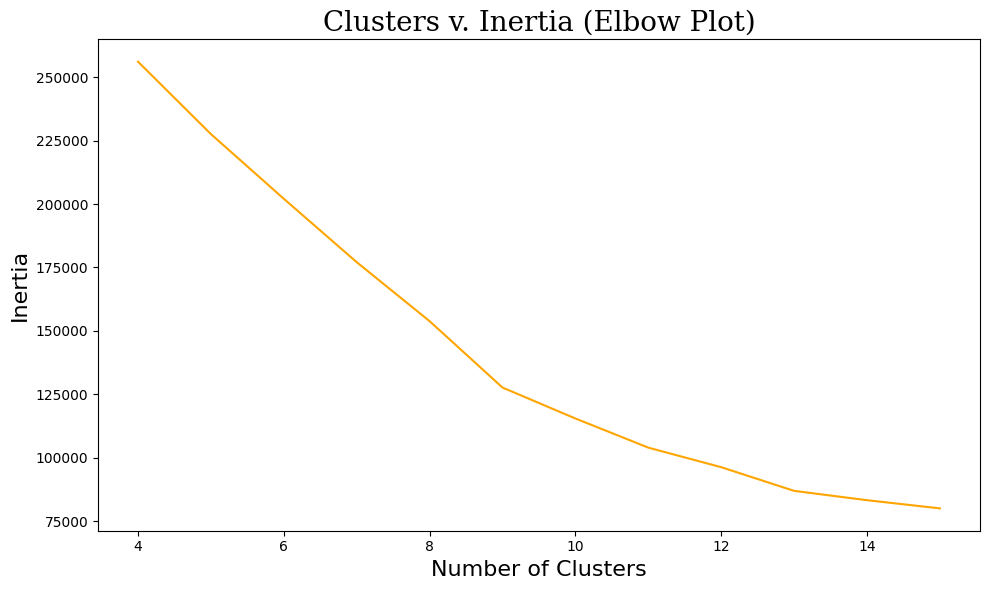

In [16]:
# make elbow plot
nclusters, inertias = list(zip(*scores))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(nclusters, inertias, color='orange')
ax.set_title("Clusters v. Inertia (Elbow Plot)", fontdict=PLOT_STYLES['title'])
ax.set_xlabel("Number of Clusters", fontdict=PLOT_STYLES['axis-label'])
ax.set_ylabel("Inertia", fontdict=PLOT_STYLES['axis-label'])
plt.tight_layout();
plt.savefig(IMGDIR + 'clustering-kmeans_elbow_plot.png')

In [17]:
%%time
# NOTE the below takes around 2 hours to run. Summary of results is below.
'''
# 9 clusters looks optimal on 25k points; not bad sil. score (almost 0.40).
n_clusters = 9

# Run on a bigger sample set. NOTE 500,000 takes around 2 hours to run
fwdf = full_df.sample(500_000)

# scale values
fwdf_ss = ss.fit_transform(fwdf[weather_cols])

# fit model
km = KMeans(n_clusters = n_clusters)
km.fit(fwdf_ss)

# get scores
print(f'inertia: {km.inertia_}; sil. sc.: {silhouette_score(fwdf_ss, km.labels_)}')
'''

CPU times: user 29 µs, sys: 11 µs, total: 40 µs
Wall time: 67.7 µs


"\n# 9 clusters looks optimal on 25k points; not bad sil. score (almost 0.40).\nn_clusters = 9\n\n# Run on a bigger sample set. NOTE 500,000 takes around 2 hours to run\nfwdf = full_df.sample(500_000)\n\n# scale values\nfwdf_ss = ss.fit_transform(fwdf[weather_cols])\n\n# fit model\nkm = KMeans(n_clusters = n_clusters)\nkm.fit(fwdf_ss)\n\n# get scores\nprint(f'inertia: {km.inertia_}; sil. sc.: {silhouette_score(fwdf_ss, km.labels_)}')\n"

The above code is copied here.
```python
# 9 clusters looks optimal on 25k points; not bad sil. score (almost 0.40).
n_clusters = 9

# Run on a bigger sample set. NOTE 500,000 takes around 2 hours to run
fwdf = full_df.sample(500_000)

# scale values
fwdf_ss = ss.fit_transform(fwdf[weather_cols])

# fit model
km = KMeans(n_clusters = n_clusters)
km.fit(fwdf_ss)

# get scores
print(f'inertia: {km.inertia_}; sil. sc.: {silhouette_score(fwdf_ss, km.labels_)}')
```
Here are the results from the above code, which took over 2 hours to run.
```
inertia: 2619171.421951194; sil. sc.: 0.40032813861412514
CPU times: user 1h 20min 5s, sys: 51min 54s, total: 2h 11min 59s
Wall time: 39min 14s
```
The above took quite a bit of time, and is still only a small subsection of the data. I have run this with a few sample sizes, and in all cases silhouette scores are unreliable. The silhouette score is sometimes quite a bit lower than the approx 0.4 score for 25,000 data points (I have gotten from 0.3 to 0.4 with different sample sizes above 25,000).

#### Conclusion

The time and resource cost for running a full KMeans Clustering analysis on all features or even a subset of features is prohibitive. The scores achieved do not justify any further attempts.

---

## 2. KPrototype Clustering

KPrototype Clustering is a combination of KMeans Clustering and KModes Clustering. KMeans clustering works on continuous numerical values, whereas KModes works on categorical values.

Here, the encoded data set was unencoded to minimize column count and create proper categorical columns. This set was fed into the KPrototype algorithm and the `cost_` property viewed to evaluate performance.

### 2a. Remove Encoding

Reverse-encode categorical columns to reduce dimensions and format for KPrototypes

In [18]:
# all columns with a '_' in them
print([c for c in full_df.columns if '_' in c])

['Wind_Speed(mph)', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'wc_clouds', 'wc_dust', 'wc_fair', 'wc_fog', 'wc_ice', 'wc_rain', 'wc_snow', 'wc_thunder', 'wc_wind', 'st_interstate', 'st_highway', 'st_other', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY', 'Side_L', 'Side_R', 'Timezone_US/Central', 'Timezone_US/Eastern', 'Timezone_US/Mountain', 'Timezone_US/Pacific', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'yea

In [19]:
# note that wc (weather condition) encodings may have duplicates due to multiple
# specified weather conditions. Not sure whether to categorize these or leave them encoded,
# so leaving encoded for now.

# The rest of these should have one value per category per row, so can be unencoded without
# fear of overlap

# The follow makes a list of currently encoded category prefixes towards eventually un-encoding them
encoded_cprefixes = ['st', 'State', 'Side', 'Timezone', 'year', 'month', 'hour']
encoded_vals = {k: list() for k in encoded_cprefixes}

# get column/category names
for prefix in encoded_cprefixes:
    encoded_vals[prefix] = [c.split('_')[1] for c in full_df.columns if c.startswith(prefix + '_')]

print(encoded_vals)

{'st': ['interstate', 'highway', 'other'], 'State': ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], 'Side': ['L', 'R'], 'Timezone': ['US/Central', 'US/Eastern', 'US/Mountain', 'US/Pacific'], 'year': ['2016', '2017', '2018', '2019', '2020', '2021'], 'month': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], 'hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']}


In [20]:
# create unencoded dataframes for each encoded prefix
unencoded_dfs = {k: None for k in encoded_cprefixes}

for prefix in encoded_vals:
    cnames = [prefix + '_' + v for v in encoded_vals[prefix]]
    unencoded_dfs[prefix] = full_df[cnames].idxmax(axis=1).apply(lambda x: x.split('_')[1])

In [21]:
# create unencoded columns dataframe
df_unenc = pd.concat(unencoded_dfs.values(), keys=unencoded_dfs.keys(), axis=1)
print(df_unenc.shape)
df_unenc.head()

(2731050, 7)


,st,State,Side,Timezone,year,month,hour
0,other,OH,R,US/Eastern,2016,2,0
1,interstate,OH,R,US/Eastern,2016,2,5
2,interstate,OH,R,US/Eastern,2016,2,6
3,interstate,OH,R,US/Eastern,2016,2,6
4,interstate,OH,R,US/Eastern,2016,2,7


In [22]:
# create new dataframe dropping old encodings and using new unencoded columns
encoded_cnames = [p + '_' + v for p in encoded_vals for v in encoded_vals[p]]
df = pd.concat([full_df.drop(columns=encoded_cnames), df_unenc], axis=1)
df.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,...,wc_snow,wc_thunder,wc_wind,st,State,Side,Timezone,year,month,hour
0,1,42.1,58.0,29.76,10.0,10.4,0.00,0,0,0,...,0,0,0,other,OH,R,US/Eastern,2016,2,0
1,0,36.9,91.0,29.68,10.0,0.0,0.02,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,5
2,0,36.0,97.0,29.70,10.0,0.0,0.02,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,6
3,0,39.0,55.0,29.65,10.0,0.0,0.00,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,6
4,1,37.0,93.0,29.69,10.0,10.4,0.01,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,7


In [23]:
# assuming all looks good, save memory by removing old variables
del df_unenc
del encoded_cnames
del encoded_cprefixes
del encoded_vals
del unencoded_dfs

### 2b. KPrototype Modeling

Fit and run a kprototypes model. The KPrototype modeling algorithm requires the categorical columns to be specified as an argument, so first get a list of the categorical features.

Much of the modeling below was performed with guidance from [a Medium article by Shivam Soliya](https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede).

In [24]:
# columns to drop
to_drop = ['Start_Time', 'Start_Lat', 'Start_Lng']

# numeric columns to use
num_cols = ['Temperature(F)',
            'Humidity(%)',
            'Pressure(in)',
            'Visibility(mi)',
            'Wind_Speed(mph)',
            'Precipitation(in)'
           ]

# categorical columns to use
cat_cols = [c for c in df.columns if c not in num_cols]

# show the columns
print(f'All columns: {df.columns}')
print(f'\nNumeric columns: {num_cols}')
print(f'\nCategorical columns: {cat_cols}')

All columns: Index(['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'wc_clouds', 'wc_dust', 'wc_fair', 'wc_fog', 'wc_ice',
       'wc_rain', 'wc_snow', 'wc_thunder', 'wc_wind', 'st', 'State', 'Side',
       'Timezone', 'year', 'month', 'hour'],
      dtype='object')

Numeric columns: ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

Categorical columns: ['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'wc_clouds', 'wc_dust', 'wc_fair', 'wc_fog', 'wc_ice', 'wc_rain', 'wc_snow', 'wc_thunder', 'wc_wind', 'st', 'State', 'Side', 'Timezone', 'year'

In [25]:
# In order to properly cluster under k-prototypes we need to have a dataframe with
# (only) numeric columns scaled.

# instantiate standard scaler
ss = StandardScaler()
# fit/transform on numeric columns only
scaled_num_data = ss.fit_transform(df[num_cols])
# turn scaled data into new dataframe and combine with categorical
df_ss = pd.concat([pd.DataFrame(scaled_num_data, columns=num_cols), df[cat_cols]], axis=1)
# check it
df_ss.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity,Amenity,Bump,Crossing,...,wc_snow,wc_thunder,wc_wind,st,State,Side,Timezone,year,month,hour
0,-1.061058,-0.280072,0.273374,0.334319,0.576307,-0.080935,1,0,0,0,...,0,0,0,other,OH,R,US/Eastern,2016,2,0
1,-1.340930,1.163988,0.196244,0.334319,-1.293580,0.205979,0,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,5
2,-1.389369,1.426545,0.215527,0.334319,-1.293580,0.205979,0,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,6
3,-1.227905,-0.411350,0.167320,0.334319,-1.293580,-0.080935,0,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,6
4,-1.335547,1.251507,0.205885,0.334319,0.576307,0.062522,1,0,0,0,...,0,0,0,interstate,OH,R,US/Eastern,2016,2,7


In [26]:
# apparently we need column index numbers, not names... so get those first
col_ixs = [df_ss.columns.get_loc(cn) for cn in cat_cols]

# also I'm going to create a smaller test dataframe because this could take a 
# while with the full one

# Note the below very low sample number is used because this algorithm took a 
# long time to run for most sample sizes
small_df = df_ss.sample(5_000, random_state=1)
small_df.shape, small_df['Severity'].value_counts(normalize=True)

((5000, 36),
 0    0.899
 1    0.101
 Name: Severity, dtype: float64)

**NOTE** according to [one article](https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede) the KPrototypes input has to be an array, not a dataframe...

In [27]:
# make an array out of a dataframe
small_array = small_df.values
small_array[:5]

array([[0.6020225003316857, -0.8051847775517763, 0.40835192476452414,
        0.3343194187088466, -0.035002393395341315, -0.08093480319517692,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 'other', 'NC', 'R', 'US/Eastern', '2021', '6', '11'],
       [0.4297940580696254, -0.4988689925445656, 0.40835192476452414,
        0.3343194187088466, 1.1876161103152258, -0.08093480319517692, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        'highway', 'OH', 'R', 'US/Eastern', '2017', '6', '14'],
       [-0.04383415815103975, 1.2952663196405256, -1.0281972551080991,
        0.3343194187088466, -1.2935802648621015, -0.08093480319517692, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        'highway', 'CA', 'R', 'US/Pacific', '2020', '6', '3'],
       [-0.4205838755992963, 1.2952663196405256, -0.15084171572280464,
        0.3343194187088466, -0.7541897485192043, 0.06252226068230396, 0,
        0, 

In [33]:
%%time
# FINALLY I'm going to run the model.

# Here's an example of the code, demonstrating how this model splits categorical from 
# non-categorical features. I will use this further below to try getting some interpretable output 
# from the model. Running this code should give an idea of the time commitment required in
# fitting this.

# because the below takes a long time we'll write labels to disk so I can save this notebook
# with the code commented out
'''
kpm = KPrototypes(10, init='Huang', random_state=1, n_jobs=-1)
kpm.fit(small_array, categorical=col_ixs)
labels = kpm.labels_

with open('kprototype-labels.json', 'w') as f:
    f.write(json.dumps(labels.tolist()))
'''

CPU times: user 514 ms, sys: 255 ms, total: 769 ms
Wall time: 6min 27s


array([9, 3, 0, ..., 9, 3, 4], dtype=uint16)

In [47]:
with open('kprototype-labels.json', 'r') as f:
    l = json.loads(f.read())
labels = np.array(l)
labels

array([9, 3, 0, ..., 9, 3, 4])

In [48]:
# Run model on a few cluster counts

# Here's a function to get a bunch of scores at once in order to test for best
# cluster count. KPrototypes has a .cost_ attribute which is (apparently) a scoring value. 
def get_cost_range(data, cat_idx=[], start=5, end=10, skip=1, model_type='Huang', random_state=1):
    costs = list()
    for k in range(start, end+1, skip):
        t = time.time()
        kpm = KPrototypes(k, init=model_type, random_state=random_state, n_jobs=-1)
        kpm.fit(data, categorical=cat_idx)
        costs.append((k, kpm.cost_))
        print(f'> {k} clusters, run time {(time.time() - t) / 60}')
    
    return costs

In [49]:
%%time

# try it out on 10-30 clusters
# NOTE the below commented code can take an hour or so to run. 
# I will manually fill in the `costs` variable from one set of fittings for plotting

costs = [(10, 21944.72070805368),
 (13, 20721.7647468641),
 (16, 19572.242773315575),
 (19, 18981.204004449086),
 (22, 18301.799788662447),
 (25, 17783.985263092232),
 (28, 17431.19909538291),
 (31, 17043.692230287976)]

'''
costs = get_cost_range(small_array, col_ixs, 10, 31, 3)
costs
'''

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 18.8 µs


'\ncosts = get_cost_range(small_array, col_ixs, 10, 31, 3)\ncosts\n'

The following results were achieved on one pass of the above code:
```
> 10 clusters, run time 4.9203309973080955
> 13 clusters, run time 7.237348433335622
> 16 clusters, run time 5.393261635303498
> 19 clusters, run time 5.747837615013123
> 22 clusters, run time 6.946661067008972
> 25 clusters, run time 8.618471932411193
> 28 clusters, run time 7.631595349311828
> 31 clusters, run time 10.716895600159964
CPU times: user 1.77 s, sys: 559 ms, total: 2.33 s
Wall time: 57min 12s
[(10, 21944.72070805368),
 (13, 20721.7647468641),
 (16, 19572.242773315575),
 (19, 18981.204004449086),
 (22, 18301.799788662447),
 (25, 17783.985263092232),
 (28, 17431.19909538291),
 (31, 17043.692230287976)]
```

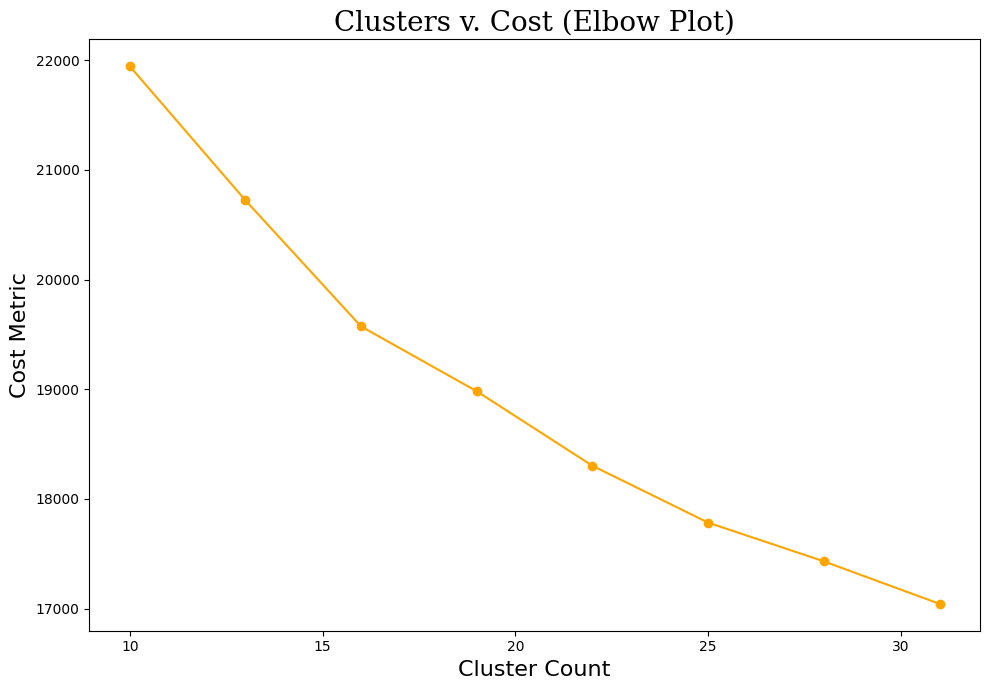

In [50]:
# plot the elbow curve (I think we need more points to really make sense of this)
cluster_nums, cost_list = zip(*costs)
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(cluster_nums, cost_list, color='orange')
ax.plot(cluster_nums, cost_list, color='orange')
ax.set_title("Clusters v. Cost (Elbow Plot)", fontdict=PLOT_STYLES['title'])
ax.set_xlabel("Cluster Count", fontdict=PLOT_STYLES['axis-label'])
ax.set_ylabel("Cost Metric", fontdict=PLOT_STYLES['axis-label'])
plt.tight_layout();
plt.savefig(IMGDIR + 'clustering-kprototypes_elbow_plot.png')

In [52]:
# Attempt to interpret results
# I'll test results on the first kpm.fit_predict I ran a few cells above (before function)
result_df = small_df.copy()
# add cluster labels to dataframe
result_df['labels'] = labels
# reverse scale numeric columns and replace in dataframe
result_df[num_cols] = pd.DataFrame(ss.inverse_transform(result_df[num_cols]), columns=num_cols).values

# group by category label
cluster_medians = result_df.groupby('labels').median()
cluster_means = result_df.groupby('labels').mean()
cluster_counts = result_df.groupby('labels').count()

In [53]:
cluster_means[0:6]

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity,Amenity,Bump,Crossing,...,Sunrise_Sunset,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_wind
labels,,,,,,,,,,,,,,,,,,,,,
0,51.758874,81.335373,29.691383,9.598531,1.985557,0.001493,0.073439,0.008568,0.001224,0.056304,...,0.729498,0.304774,0.004896,0.618115,0.013464,0.000000,0.055080,0.002448,0.002448,0.000000
1,50.303748,91.045365,29.518363,2.772584,6.189349,0.020473,0.102564,0.005917,0.000000,0.051282,...,0.455621,0.246548,0.003945,0.037475,0.250493,0.005917,0.315582,0.130178,0.021696,0.025641
2,60.735823,48.321519,29.756911,9.854430,5.570253,0.000203,0.073418,0.003797,0.000000,0.063291,...,0.277215,0.189873,0.002532,0.791139,0.010127,0.000000,0.003797,0.000000,0.002532,0.000000
3,69.929908,58.100917,29.726734,9.860550,15.574862,0.001394,0.115596,0.023853,0.000000,0.102752,...,0.141284,0.605505,0.000000,0.332110,0.001835,0.000000,0.042202,0.001835,0.022018,0.099083
4,35.596842,72.941053,29.540611,9.656842,9.532211,0.002505,0.134737,0.004211,0.000000,0.035789,...,0.545263,0.663158,0.000000,0.235789,0.002105,0.002105,0.071579,0.025263,0.002105,0.006316
5,69.500000,92.300000,29.786000,3.070000,10.750000,0.852000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0.100000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.600000,0.000000


In [ ]:
# Try plotting these, normalized
mms = MinMaxScaler()
cluster_means_ss = mms.fit_transform(cluster_means)

fig, ax = plt.subplots(figsize=(14, 7))

for ix in range(len(cluster_means.T[:6])):
    ax.plot(range(1,11), cluster_means_ss.T[ix], label=cluster_means.T.index[ix], alpha=0.5)
    ax.scatter(range(1,11), cluster_means_ss.T[ix])
    ax.set_xticks(list(range(1,11)))
    ax.grid(True, 'major', 'x', ls=':')    

ax.set_title("Normalized Mean Weather Values for 10 Classes", fontdict=PLOT_STYLES['title'])    
ax.set_xlabel("Class", fontdict=PLOT_STYLES['axis-label'])
ax.set_ylabel("Normalized Mean Value", fontdict=PLOT_STYLES['axis-label'])
ax.legend();
plt.savefig(IMGDIR + 'clustering-10class_mean_vals.png')

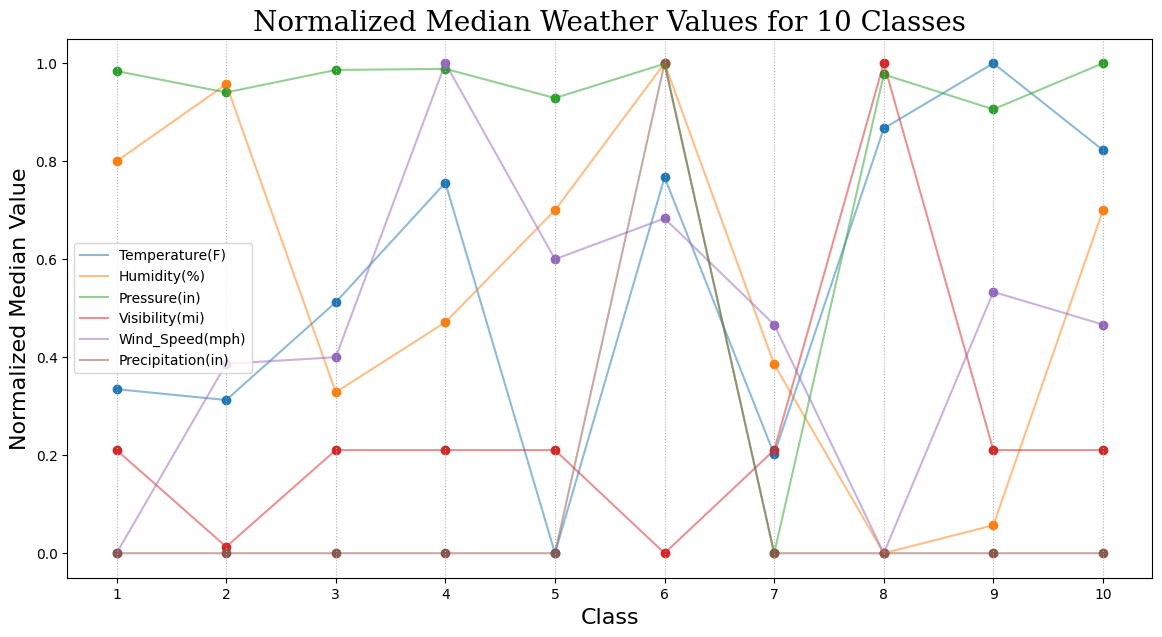

In [58]:
mms = MinMaxScaler()
cluster_medians_ss = mms.fit_transform(cluster_medians)

fig, ax = plt.subplots(figsize=(14, 7))

for ix in range(len(cluster_medians.T[:6])):
    ax.plot(range(1,11), cluster_medians_ss.T[ix], label=cluster_medians.T.index[ix], alpha=0.5)
    ax.scatter(range(1,11), cluster_medians_ss.T[ix])
    ax.set_xticks(list(range(1,11)))
    ax.grid(True, 'major', 'x', ls=':')    

ax.set_title("Normalized Median Weather Values for 10 Classes", fontdict=PLOT_STYLES['title'])    
ax.set_xlabel("Class", fontdict=PLOT_STYLES['axis-label'])
ax.set_ylabel("Normalized Median Value", fontdict=PLOT_STYLES['axis-label'])
ax.legend()

#### Conclusion

The above graphs attempt to make a coherent display of the cluster label means and medians over the 6 main weather features. They are mostly experimental, aiming to see if there is some patterning to the clusters here, lacking more sophisticated visualization techniques. At very least, a takeaway from these graphs is that clustering is not very defined here. Many of the means and medians look identical over clusters, suggesting that this data doesn't define itself well as clustered data (at least under the KPrototypes model).

Perhaps more importantly, though, is that this is run on just a tiny subset of the data: 5,000 points. Just testing 8 clustering combinations on 5,000 points took an hour. Trying to run this on 10,000 or more points ended up with a prohibitive running time.

The combination of potentially poor clustering performance and prohibitive runtime led to the conclusion that it was not worth further pursuing the clustering exploration.

----

## 4. PCA

With PCA we are trying to see if there are any feature relationships that are more prevalent in the data. The goal is that a few feature relationship will be a lot more common than others, and can explain a majority of the data relative to the rest of the features.

In [ ]:
# Scale data
ss = StandardScaler()
full_df_ss = ss.fit_transform(full_df.drop(columns=['Severity']))

In [ ]:
# fit PCA to show components that explain 80% of variance
pca = PCA(n_components=0.8)
pca.fit(full_df_ss)

In [ ]:
# Check number of components - there are 85 of these!
n_comps = len(pca.explained_variance_ratio_)
n_comps

In [ ]:
# plot to show distribution
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(range(1,n_comps+1), pca.explained_variance_ratio_, lw=2, color='orange')
ax.scatter(range(1, n_comps+1), pca.explained_variance_ratio_, s=100, color='orange', alpha=0.3)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

**Note:** While this looks promising, in that there is a clear variance ratio drop from principal component 1 through 10 or so, the actual ratios are very small and not especially significant relative to the rest of the components. The highest explained variance is only 2% of the variance - not a significant chunk at all.

In [ ]:
evr_cumsum = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(evr_cumsum, color='orange')
ax.scatter(list(range(len(evr_cumsum))),evr_cumsum, color='orange');

**Note:** This graph supports the previous. The lack of a strong elbow here means that these component variances just aren't that different, so it can't be said that any small subset of these components carries a majority of the variance of this data set.

In [ ]:
# show an example of the component values up to component 8
component_df = pd.DataFrame(pca.components_[:8], 
                            columns=full_df.drop(columns=['Severity']).columns,
                            index=list(range(1,9))
                           )
component_df.T.head(6)

#### Conclusion

As mentioned above, PCA does not show a strong set of majority components, so it does not help interpret the data or provide tools to further explore.

---

## 5. Conclusion

The clustering and PCA analyses were attempted in order to see if any insights could be gained into the data. If the data showed any strong clustering tendencies or principal components, further review could be done to potentially draw conclusions from those analyses towards helping make recommendations in connection with the problem statement.

However, seeing as none of these analyses provided meaningful information, they have all been abandoned.

It is possible other clustering methods could be applicable here, or better clustering could be achieved on a more curated subset of data. However, due to computing and time constraints, such explorations must be left to another time.